In [3]:
# 📦 Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import shap

# 🔄 Carica il dataset
df = pd.read_parquet("../data/processed/RM_Dimessi_clean.parquet")

# 🧮 Calcolo Delta Barthel
df["delta_barthel"] = df["barthel_totale_dim"] - df["barthel_totale_ing"]

# 📊 Distribuzione della variabile target
plt.figure(figsize=(10, 5))
sns.histplot(df["delta_barthel"].dropna(), kde=True, bins=30, color='teal')
plt.title("Distribuzione Delta Barthel (Dim - Ing)", fontsize=16)
plt.xlabel("Delta Barthel")
plt.ylabel("Frequenza")
plt.grid(True)
plt.tight_layout()
plt.show()

# 🧹 Pulizia - rimuovi righe con target mancante
df_model = df.dropna(subset=["delta_barthel"])

# 🎯 Definizione feature e target
X = df_model.drop(columns=["delta_barthel", "barthel_totale_ing", "barthel_totale_dim", "codpaz"], errors='ignore')
y = df_model["delta_barthel"]

# 🧼 Rimuovi variabili non numeriche (o usa encoding avanzato se necessario)
X = X.select_dtypes(include=["int64", "float64"])

# ✂️ Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🚀 Modello
model = XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# 📈 Predizione
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"🎯 R²: {r2:.3f} | MAE: {mae:.2f}")

# 💡 SHAP per interpretabilità
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# 📊 Plot summary
plt.figure(figsize=(12, 6))
shap.plots.beeswarm(shap_values, max_display=20)

KeyError: 'barthel_totale_dim'

In [4]:
[col for col in df.columns if "barthel" in col.lower()]


[]

In [5]:
[col for col in df.columns if "bar" in col.lower()]

['bartric1',
 'bartric2',
 'bartric3',
 'bartric4',
 'bartric5',
 'bartric6',
 'bartric7',
 'bartric8',
 'bartric9',
 'bartric10',
 'bartric11',
 'bartdim1',
 'bartdim2',
 'bartdim3',
 'bartdim4',
 'bartdim5',
 'bartdim6',
 'bartdim7',
 'bartdim8',
 'bartdim9',
 'bartdim10',
 'bartdim11']

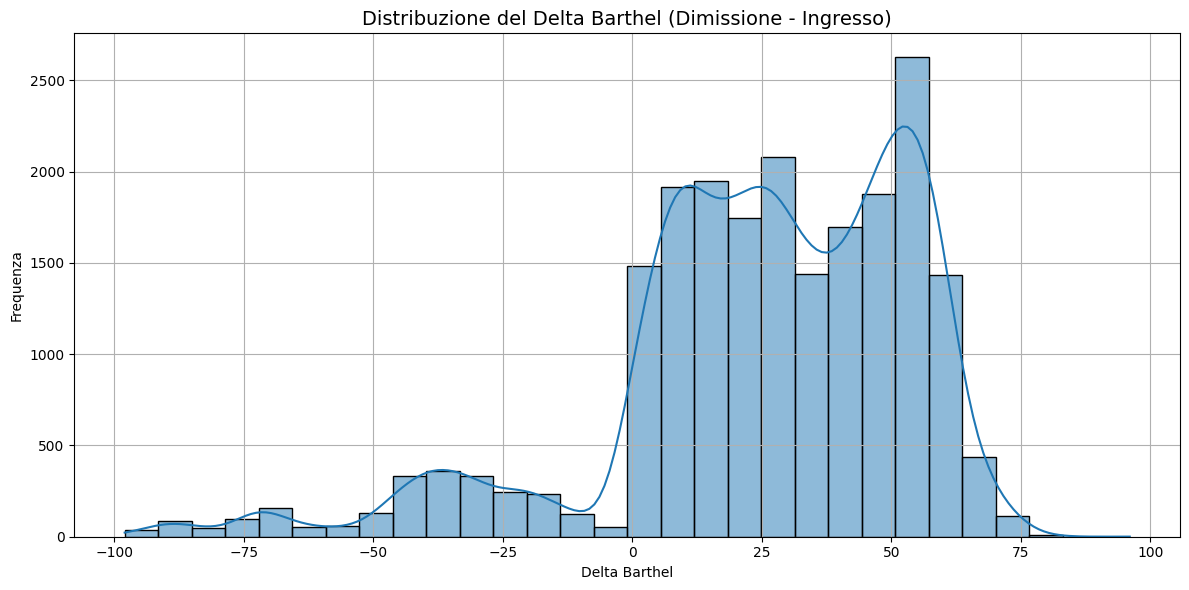

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carica il dataset
df = pd.read_parquet("../data/processed/RM_Dimessi_clean.parquet")

# Crea le colonne somma per il Barthel
barthel_ingresso_cols = [f'bartric{i}' for i in range(1, 12)]
barthel_dimissione_cols = [f'bartdim{i}' for i in range(1, 12)]

df['barthel_totale_ingresso'] = df[barthel_ingresso_cols].sum(axis=1)
df['barthel_totale_dimissione'] = df[barthel_dimissione_cols].sum(axis=1)

# Calcola il delta Barthel
df['delta_barthel'] = df['barthel_totale_dimissione'] - df['barthel_totale_ingresso']

# Rimuove righe con valori mancanti
df = df.dropna(subset=['delta_barthel'])

# Plot della distribuzione del delta Barthel
plt.figure(figsize=(12, 6))
sns.histplot(df['delta_barthel'], bins=30, kde=True)
plt.title('Distribuzione del Delta Barthel (Dimissione - Ingresso)', fontsize=14)
plt.xlabel('Delta Barthel')
plt.ylabel('Frequenza')
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
# 📦 Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
import shap

# 🔄 Caricamento dataset
df = pd.read_parquet("../data/processed/RM_Dimessi_clean.parquet")

# Calcolo variabili Barthel
barthel_ingresso_cols = [f'bartric{i}' for i in range(1, 12)]
barthel_dimissione_cols = [f'bartdim{i}' for i in range(1, 12)]

df["barthel_totale_ingresso"] = df[barthel_ingresso_cols].sum(axis=1)
df["barthel_totale_dimissione"] = df[barthel_dimissione_cols].sum(axis=1)
df["delta_barthel"] = df["barthel_totale_dimissione"] - df["barthel_totale_ingresso"]

# Filtraggio dati validi
df_model = df.dropna(subset=["delta_barthel"])

# 🔎 Feature selection (modifica se servono categoriali)
feature_cols = [
    "età del paziente dimesso",
    "barthel_totale_ingresso",
    "degenza",  # se presente
    "locomric", "respirric", "contrsfinric", "nutrric", "trachric", "postcomric", "mieloric"
]

X = df_model[feature_cols].copy()
y = df_model["delta_barthel"]

# 🔁 Rimuove eventuali NaN
X = X.dropna()
y = y.loc[X.index]

# ✂️ Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 🚀 Modello XGBoost
model = XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# 📈 Valutazione
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"🎯 R²: {r2:.3f} | MAE: {mae:.2f}")

🎯 R²: 0.490 | MAE: 14.17


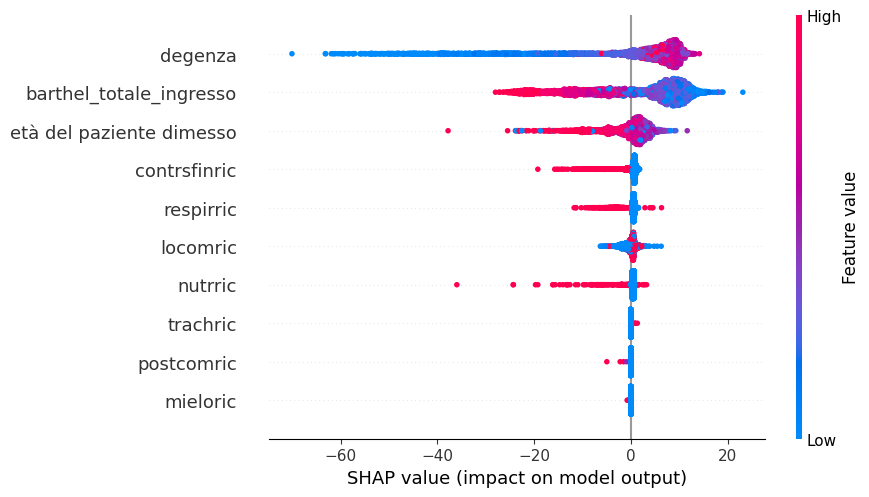

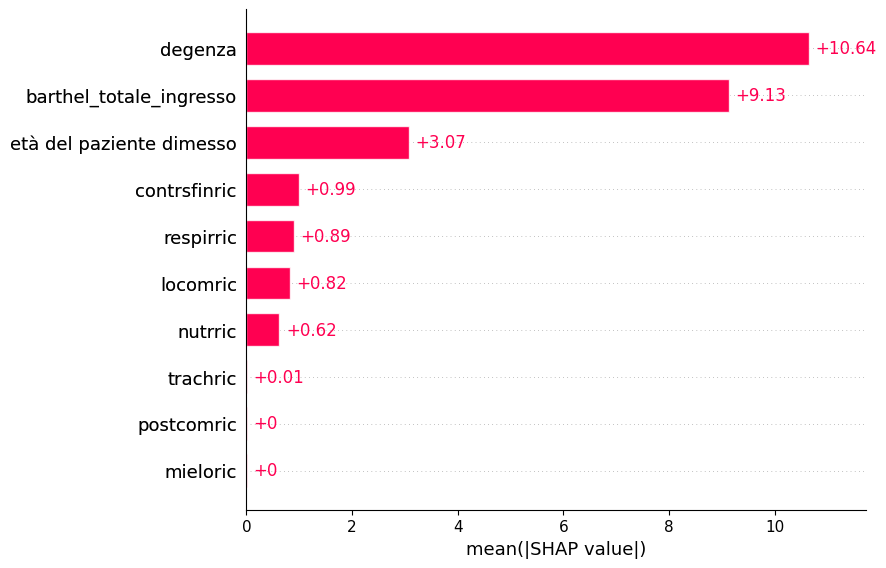

In [10]:
# 📊 SHAP
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

# Beeswarm plot
shap.plots.beeswarm(shap_values, max_display=20)

# (Facoltativo) Summary bar plot
shap.plots.bar(shap_values, max_display=20)